In [ ]:
# Instalar librerías necesarias
!pip install matplotlib scipy pandas seaborn --quiet

In [ ]:
# Importar las librerías
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

In [ ]:
# Subir el archivo CSV desde tu computadora
from google.colab import files
uploaded = files.upload()

Saving Metallodrugs_PubChem_MetalFP_ECFP4.csv to Metallodrugs_PubChem_MetalFP_ECFP4.csv


In [ ]:
# Cargar el archivo CSV en un DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df

,Name,Type,PubChem_ID,Metal_Or_Radioisotope,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,...,bitvector_ECFP41015,bitvector_ECFP41016,bitvector_ECFP41017,bitvector_ECFP41018,bitvector_ECFP41019,bitvector_ECFP41020,bitvector_ECFP41021,bitvector_ECFP41022,bitvector_ECFP41023,Met_Charg_EState_ECFP4
0,Oxaliplatin,Metallodrug,9887053,Pt,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
1,Carboplatin,Metallodrug,426756,Pt,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
2,Lobaplatin,Metallodrug,24202037,Pt,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
3,Nedaplatin,Metallodrug,6917890,Pt,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
4,Picoplatin,Metallodrug,177358,Pt,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
5,Iproplatin,Metallodrug,155491322,Pt,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
6,Aurothiomalate,Metallodrug,422786,Au,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
7,Auranofin,Metallodrug,24199313,Au,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
8,Aurothiosulfate,Metallodrug,27176,Au,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0000000000000000000000000000000000000000000000...
9,Aurothiopropanolsulphonate,Metallodrug,10452965,Au,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0100000000000000000000000000000000000000000000...


In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

In [ ]:
# Excluir columnas no deseadas
exclude_columns = ['Name', 'Type', 'PubChem_ID', 'Metal_Or_Radioisotope', 'Met_Charg_EState_ECFP4']
df_filtered = df.drop(columns=exclude_columns)

Media de las distancias: 0.6905


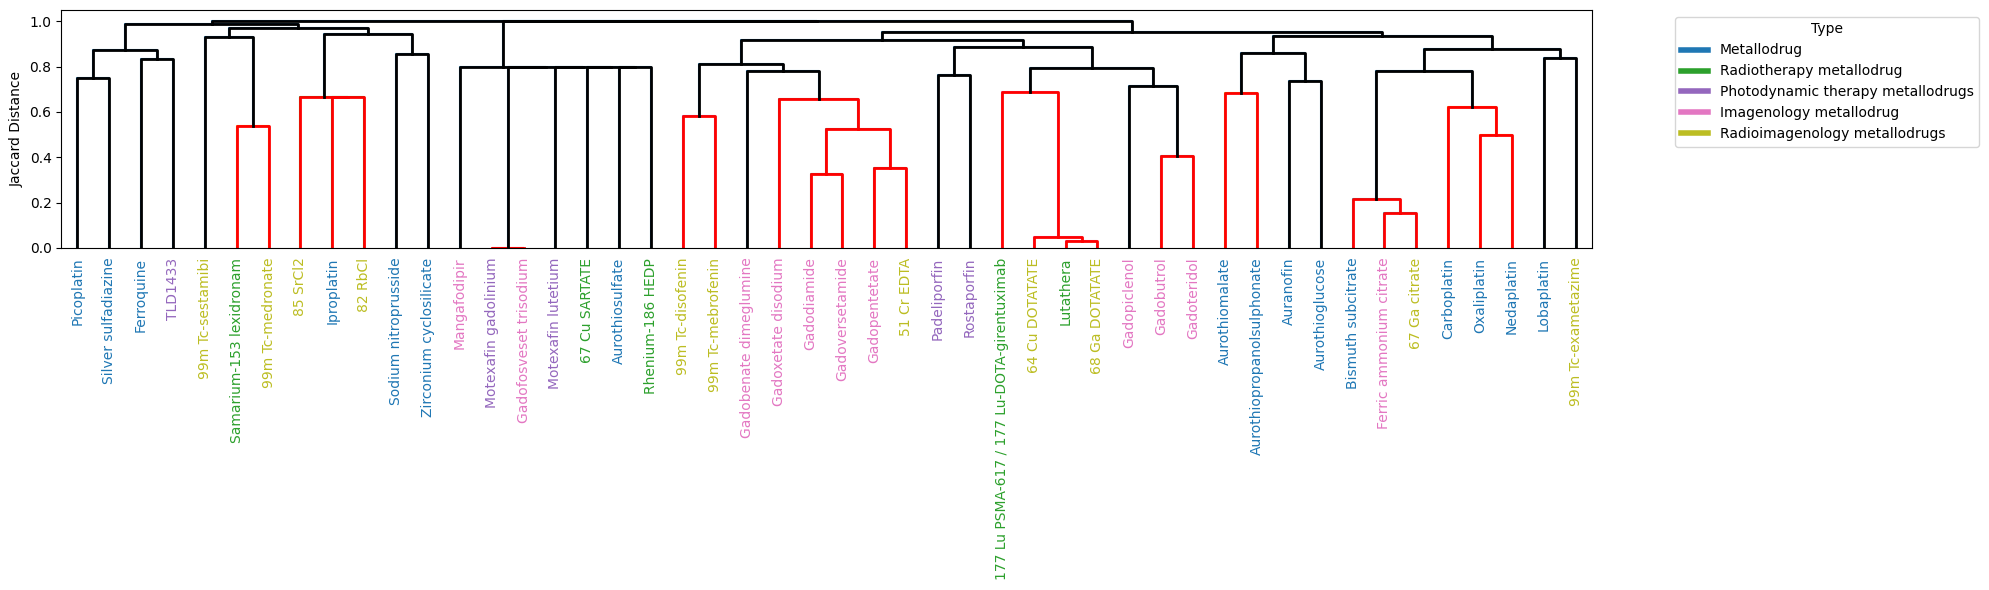

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Crear un mapa de colores para los grupos en "Type"
unique_types = df['Type'].unique()
type_color_map = {type_: plt.cm.tab10(i / len(unique_types)) for i, type_ in enumerate(unique_types)}

# Calcular la matriz de distancias (métrica Jaccard)
distance_matrix = pdist(df_filtered, metric='jaccard')

# Aplicar el clustering jerárquico
linkage_matrix = linkage(distance_matrix, method='complete')  # Método 'complete' para clustering

# Calcular la media de las distancias en el dendrograma
mean_distance = np.mean(linkage_matrix[:, 2])
print(f"Media de las distancias: {mean_distance:.4f}")

# Dibujar el dendrograma
plt.figure(figsize=(20, 6))
dendro = dendrogram(
    linkage_matrix,
    labels=df['Name'].values,  # Etiquetas con los nombres de la columna 'Name'
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=0.69,  # Umbral de distancia para colorear los clusters
)

# Colorear las etiquetas según el grupo "Type"
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()

for label in x_labels:
    sample_name = label.get_text()
    type_ = df.loc[df['Name'] == sample_name, 'Type'].values[0]
    label.set_color(type_color_map[type_])

# Colorear las líneas del dendrograma según el índice de Jaccard
for i, d in zip(dendro['icoord'], dendro['dcoord']):
    # Obtener el índice de la distancia del cluster
    dist = d[1]  # Usamos el valor de la distancia en el dendrograma
    if dist <= 0.69:
        # Color para distancias menores o iguales a 0.690
        ax.plot(i, d, color='red', lw=2)  # Cambiar a otro color si lo prefieres
    else:
        # Color para distancias mayores a 0.69
        ax.plot(i, d, color='black', lw=2)  # Color negro para clusters distantes

# Crear la leyenda
legend_handles = [
    plt.Line2D([0], [0], color=type_color_map[type_], lw=4, label=type_)
    for type_ in unique_types
]
plt.legend(handles=legend_handles, title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir títulos y mostrar
plt.ylabel('Jaccard Distance')
plt.tight_layout()
plt.show()


<ipython-input-9-86cdd1f76c55>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=same_type_distances, x='Type1', y='Distance', palette='tab10')


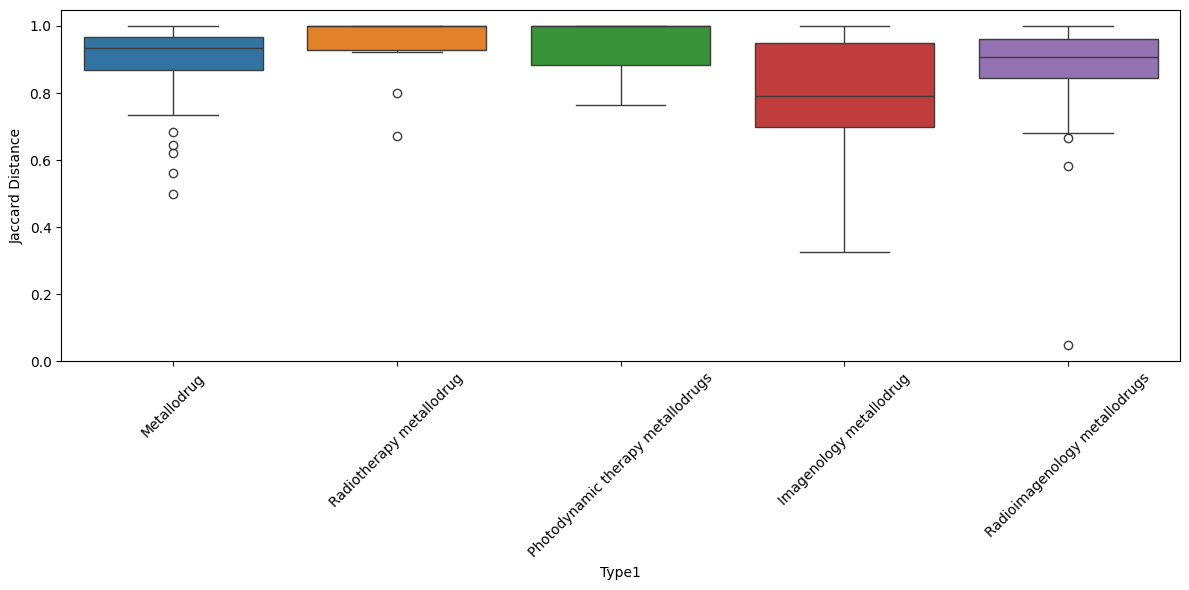

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

# Convertir la matriz de distancias en una matriz cuadrada
square_distance_matrix = squareform(distance_matrix)

# Crear un DataFrame para almacenar las distancias con sus categorías
distance_data = []
names = df['Name'].values
types = df['Type'].values

for i in range(len(names)):
    for j in range(i + 1, len(names)):
        distance_data.append({
            'Compound1': names[i],
            'Compound2': names[j],
            'Type1': types[i],
            'Type2': types[j],
            'Distance': square_distance_matrix[i, j]
        })

distance_df = pd.DataFrame(distance_data)

# Filtrar las distancias dentro de la misma categoría (Type1 == Type2)
same_type_distances = distance_df[distance_df['Type1'] == distance_df['Type2']]

# Crear el box plot utilizando Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=same_type_distances, x='Type1', y='Distance', palette='tab10')

# Configuración del gráfico
plt.ylabel('Jaccard Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


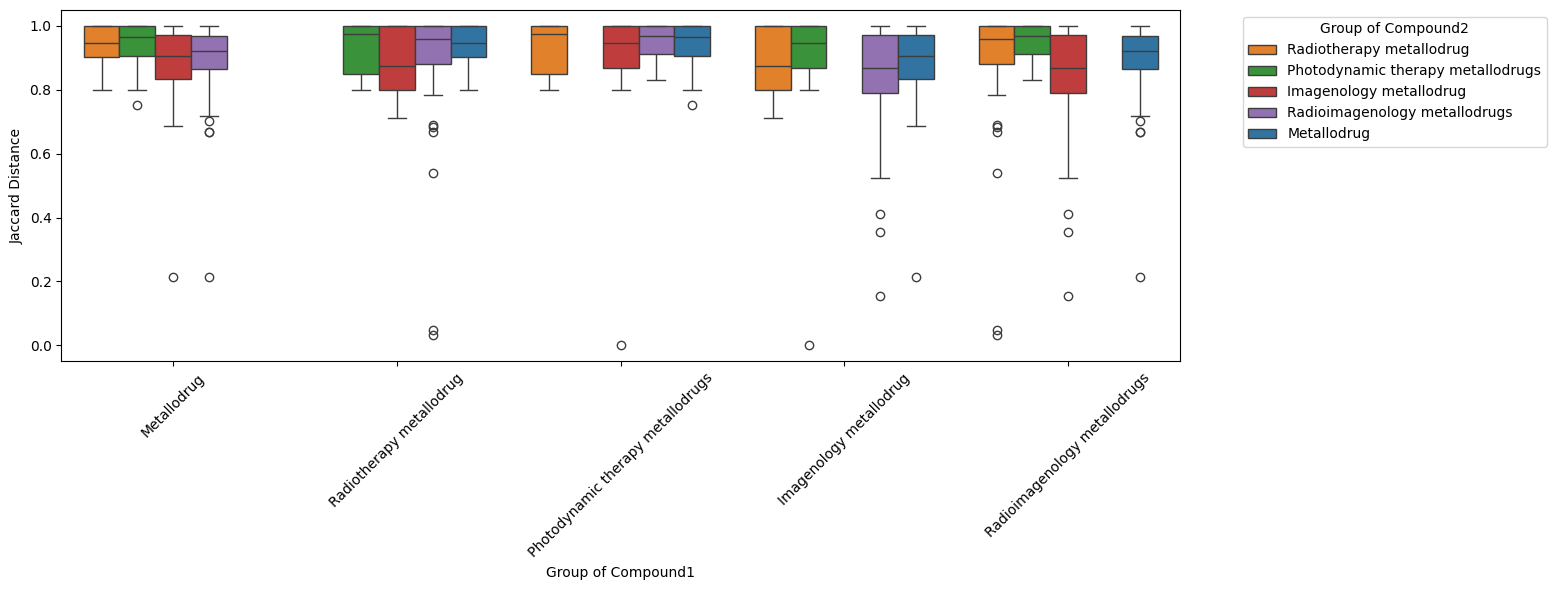

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

# Convertir la matriz de distancias en una matriz cuadrada
square_distance_matrix = squareform(distance_matrix)

# Crear un DataFrame para almacenar las distancias con sus categorías
distance_data = []
names = df['Name'].values
types = df['Type'].values

for i in range(len(names)):
    for j in range(len(names)):
        if types[i] != types[j]:  # Comparar solo entre diferentes tipos
            distance_data.append({
                'Compound1': names[i],
                'Compound2': names[j],
                'Type1': types[i],
                'Type2': types[j],
                'Distance': square_distance_matrix[i, j]
            })

distance_df = pd.DataFrame(distance_data)

# Obtener colores de la paleta tab10
unique_types = df['Type'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_types))
color_dict = dict(zip(unique_types, palette))

# Crear el box plot utilizando los colores personalizados
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=distance_df,
    x='Type1',
    y='Distance',
    hue='Type2',
    palette=color_dict
)

# Configuración del gráfico
plt.ylabel('Jaccard Distance')
plt.xlabel('Group of Compound1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Group of Compound2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
